In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Connect to the SQLite database
conn = sqlite3.connect('C:\\Users\\Ravi\\Desktop\\dataset airlines\\travel.sqlite')
cursor = conn.cursor()

# Fetch table names
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
print("List of tables present in the database:")

# Store and display the list of table names
table_list = [table[0] for table in cursor.fetchall()]
print(table_list)

List of tables present in the database:
['aircrafts_data', 'airports_data', 'boarding_passes', 'bookings', 'flights', 'seats', 'ticket_flights', 'tickets']


In [10]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", conn)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [11]:
airports_data=pd.read_sql_query("select * from airports_data",conn)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [12]:
boarding_passes=pd.read_sql_query("select * from boarding_passes",conn)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [13]:
bookings=pd.read_sql_query("select * from bookings",conn)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [14]:
flights=pd.read_sql_query("select * from flights",conn)
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [15]:
seats=pd.read_sql_query("select * from seats",conn)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [16]:
ticket_flights=pd.read_sql_query("select * from ticket_flights",conn)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [17]:
tickets=pd.read_sql_query("select * from tickets",conn)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [18]:
for table in table_list:
    print('\ntable: ', table)
    db_list=pd.read_sql_query(f"select * from {table}",conn)
    print(db_list.isnull().sum())


table:  aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table:  airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table:  boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table:  bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table:  flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table:  seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table:  ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table:  tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


In [19]:
seats.columns

Index(['aircraft_code', 'seat_no', 'fare_conditions'], dtype='object')

**Basic Analysis**

**How many planes have more than 100 seats?**

In [20]:
df = pd.read_sql_query("""
    SELECT aircraft_code, COUNT(*) AS num
    FROM seats 
    GROUP BY aircraft_code
    HAVING num > 100
""", conn)
df

,aircraft_code,num
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


**How the number of tickets booked and total amount earned changed with the time?**

In [21]:
tickets.columns

Index(['ticket_no', 'book_ref', 'passenger_id'], dtype='object')

In [22]:
bookings.columns

Index(['book_ref', 'book_date', 'total_amount'], dtype='object')

In [24]:
tic_book=pd.read_sql_query("""select * 
from tickets t 
inner join bookings b  
on t.book_ref=b.book_ref""",conn)
tic_book

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03,12400
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03,12400
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03,24700
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03,24700
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03,30900
...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03,210600
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03,210600
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03,45900
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03,219400


In [25]:
tic_book.dtypes

ticket_no       object
book_ref        object
passenger_id    object
book_ref        object
book_date       object
total_amount     int64
dtype: object

In [26]:
tic_book['date']=pd.to_datetime(tic_book['book_date'])

In [27]:
tic_book

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03,12400,2017-07-05 20:19:00+03:00
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03,12400,2017-07-05 20:19:00+03:00
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03,24700,2017-06-29 01:55:00+03:00
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03,24700,2017-06-29 01:55:00+03:00
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03,30900,2017-07-03 04:37:00+03:00
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03,210600,2017-08-14 11:50:00+03:00
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03,210600,2017-08-14 11:50:00+03:00
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03,45900,2017-08-13 03:49:00+03:00
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03,219400,2017-08-15 15:54:00+03:00


In [28]:
tic_book.dtypes

ticket_no                          object
book_ref                           object
passenger_id                       object
book_ref                           object
book_date                          object
total_amount                        int64
date            datetime64[ns, UTC+03:00]
dtype: object

In [29]:
tic_book['date']=tic_book['date'].dt.date

In [30]:
tic_book

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03,219400,2017-08-15


In [31]:
x=tic_book.groupby('date')[['date']].count()
x

,date
date,
2017-06-21,6
2017-06-22,12
2017-06-23,28
2017-06-24,106
2017-06-25,266
2017-06-26,499
2017-06-27,1028
2017-06-28,1678
2017-06-29,2765


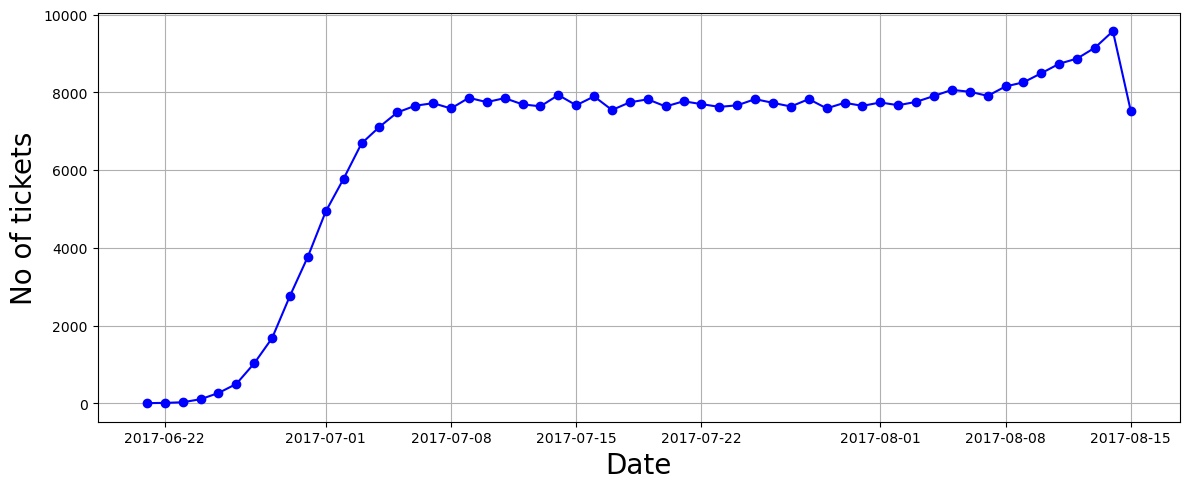

In [32]:
fig,ax= plt.subplots(figsize=(12,5))
ax.plot(x.index,x.values,color='blue',marker='o')
ax.set_xlabel('Date',fontsize=20)
ax.set_ylabel('No of tickets',fontsize=20)
plt.grid('b')
plt.tight_layout()
plt.show()

In [33]:
bookings.columns

Index(['book_ref', 'book_date', 'total_amount'], dtype='object')

In [34]:
bookings.dtypes

book_ref        object
book_date       object
total_amount     int64
dtype: object

In [35]:
bookings['date']=pd.to_datetime(bookings['book_date'])

In [36]:
bookings.dtypes

book_ref                           object
book_date                          object
total_amount                        int64
date            datetime64[ns, UTC+03:00]
dtype: object

In [37]:
bookings['date']=bookings['date'].dt.date

In [38]:
bookings

,book_ref,book_date,total_amount,date
0,00000F,2017-07-05 03:12:00+03,265700,2017-07-05
1,000012,2017-07-14 09:02:00+03,37900,2017-07-14
2,000068,2017-08-15 14:27:00+03,18100,2017-08-15
3,000181,2017-08-10 13:28:00+03,131800,2017-08-10
4,0002D8,2017-08-07 21:40:00+03,23600,2017-08-07
...,...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000,2017-07-17
262784,FFFF2C,2017-08-08 05:55:00+03,10800,2017-08-08
262785,FFFF43,2017-07-20 20:42:00+03,78500,2017-07-20
262786,FFFFA8,2017-08-08 04:45:00+03,28800,2017-08-08


In [39]:
amount=bookings.groupby('date')[['total_amount']].sum()
amount

,total_amount
date,
2017-06-21,441900
2017-06-22,775300
2017-06-23,1822000
2017-06-24,5977000
2017-06-25,15305400
2017-06-26,29049100
2017-06-27,54339900
2017-06-28,91256400
2017-06-29,152484000


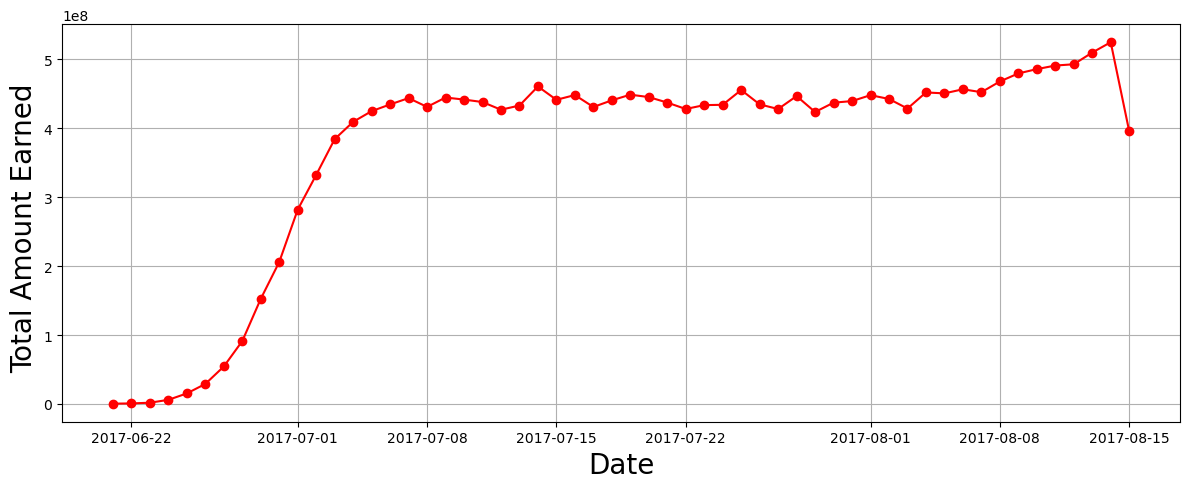

In [40]:
fig,ax= plt.subplots(figsize=(12,5))
ax.plot(amount.index,amount.values,color='red',marker='o')
ax.set_xlabel('Date',fontsize=20)
ax.set_ylabel('Total Amount Earned ',fontsize=20)
plt.grid('b')
plt.tight_layout()
plt.show()

In [41]:
flights.columns

Index(['flight_id', 'flight_no', 'scheduled_departure', 'scheduled_arrival',
       'departure_airport', 'arrival_airport', 'status', 'aircraft_code',
       'actual_departure', 'actual_arrival'],
      dtype='object')

In [42]:
ticket_flights.columns

Index(['ticket_no', 'flight_id', 'fare_conditions', 'amount'], dtype='object')

In [43]:
df1=pd.read_sql_query("""select *
from flights f 
inner join ticket_flights ft
on f.flight_id=ft.flight_id
""",conn)
df1

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival,ticket_no,flight_id,fare_conditions,amount
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N,0005432873502,1185,Economy,38300
1,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N,0005432873503,1185,Economy,38300
2,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N,0005432607659,3979,Economy,19300
3,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N,0005432607660,3979,Economy,19300
4,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N,0005432607661,3979,Economy,19300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045721,33121,PG0063,2017-08-26 19:25:00+03,2017-08-26 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N,0005435383283,33121,Economy,5400
1045722,33121,PG0063,2017-08-26 19:25:00+03,2017-08-26 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N,0005435383284,33121,Economy,5400
1045723,33121,PG0063,2017-08-26 19:25:00+03,2017-08-26 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N,0005435383285,33121,Economy,5900
1045724,33121,PG0063,2017-08-26 19:25:00+03,2017-08-26 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N,0005435383286,33121,Economy,5400


In [44]:
df=pd.read_sql_query("""select f.aircraft_code, ft.fare_conditions, round(AVG(ft.amount),2) as amount_fare
from flights f 
inner join ticket_flights ft
on f.flight_id=ft.flight_id
group by f.aircraft_code, ft.fare_conditions""",conn)
df

,aircraft_code,fare_conditions,amount_fare
0,319,Business,113550.56
1,319,Economy,38311.40
2,321,Business,34435.66
3,321,Economy,11534.97
4,733,Business,41865.63
5,733,Economy,13985.15
6,763,Business,82839.84
7,763,Economy,27594.72
8,773,Business,57779.91
9,773,Comfort,32740.55


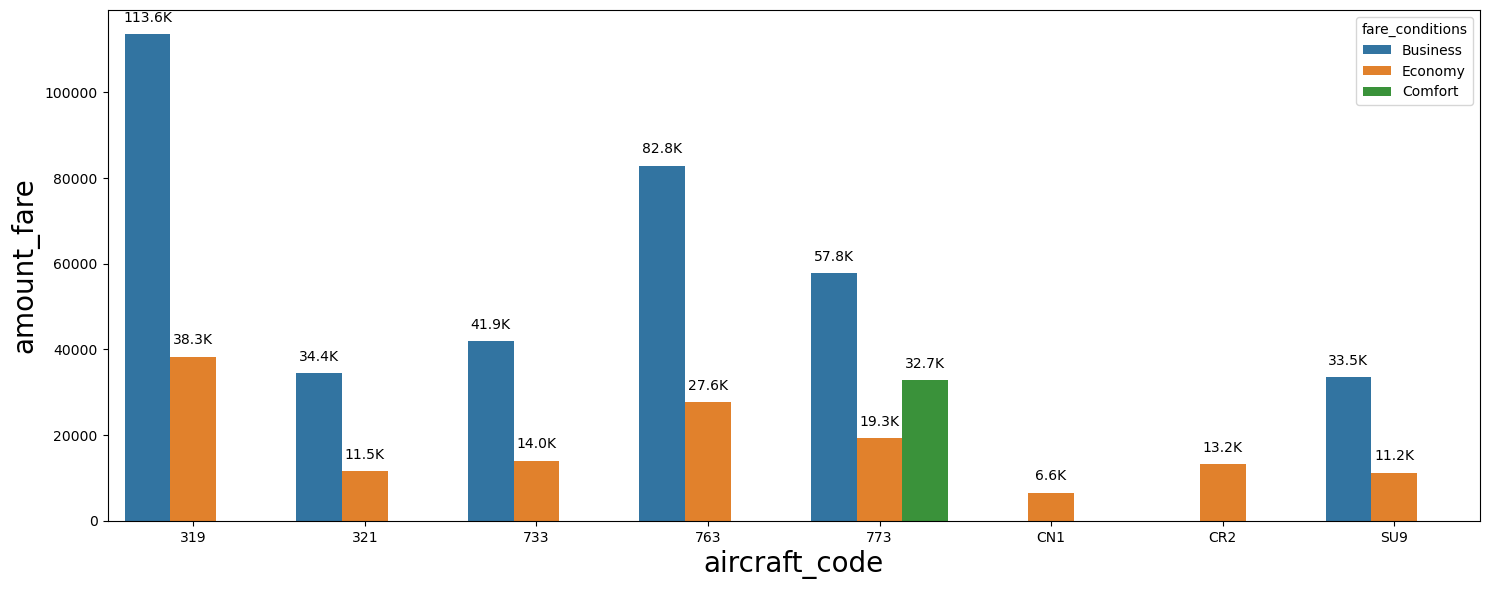

In [104]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=df,x='aircraft_code',y='amount_fare',hue='fare_conditions')

#Adding Data labels 
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.02 * max(df['amount_fare']),  # <- spacing added here
            f'{height / 1000:.1f}K',
            ha='center', va='bottom',
            fontsize=10,
            rotation=0,  # set to 90 if you prefer vertical
            color='black'
        )

plt.xlabel('aircraft_code',fontsize=20)
plt.ylabel('amount_fare',fontsize=20)
plt.tight_layout()
plt.show()

## Analyzing Occupancy Rate

In [ ]:
**For each aircraft, calculate the total revenue per year and the average revenue per ticket**

In [46]:
df2 = pd.read_sql_query("""
SELECT 
    sub.aircraft_code,
    sub.ticket_count,
    sub.Total_Revenue,
    round(sub.Total_Revenue * 1.0 / sub.ticket_count) AS Avg_Rev_Per_Ticket
FROM (
    SELECT 
        f.aircraft_code,
        COUNT(*) AS ticket_count,
        SUM(ft.amount) AS Total_Revenue
    FROM flights f
    INNER JOIN ticket_flights ft ON f.flight_id = ft.flight_id
    GROUP BY f.aircraft_code
) AS sub
""", conn)

df2

,aircraft_code,ticket_count,Total_Revenue,Avg_Rev_Per_Ticket
0,319,52853,2706163100,51202.0
1,321,107129,1638164100,15292.0
2,733,86102,1426552100,16568.0
3,763,124774,4371277100,35034.0
4,773,144376,3431205500,23766.0
5,CN1,14672,96373800,6569.0
6,CR2,150122,1982760500,13208.0
7,SU9,365698,5114484700,13986.0


In [47]:
df2=df2.sort_values(['Total_Revenue'],ascending=False)
df2

,aircraft_code,ticket_count,Total_Revenue,Avg_Rev_Per_Ticket
7,SU9,365698,5114484700,13986.0
3,763,124774,4371277100,35034.0
4,773,144376,3431205500,23766.0
0,319,52853,2706163100,51202.0
6,CR2,150122,1982760500,13208.0
1,321,107129,1638164100,15292.0
2,733,86102,1426552100,16568.0
5,CN1,14672,96373800,6569.0


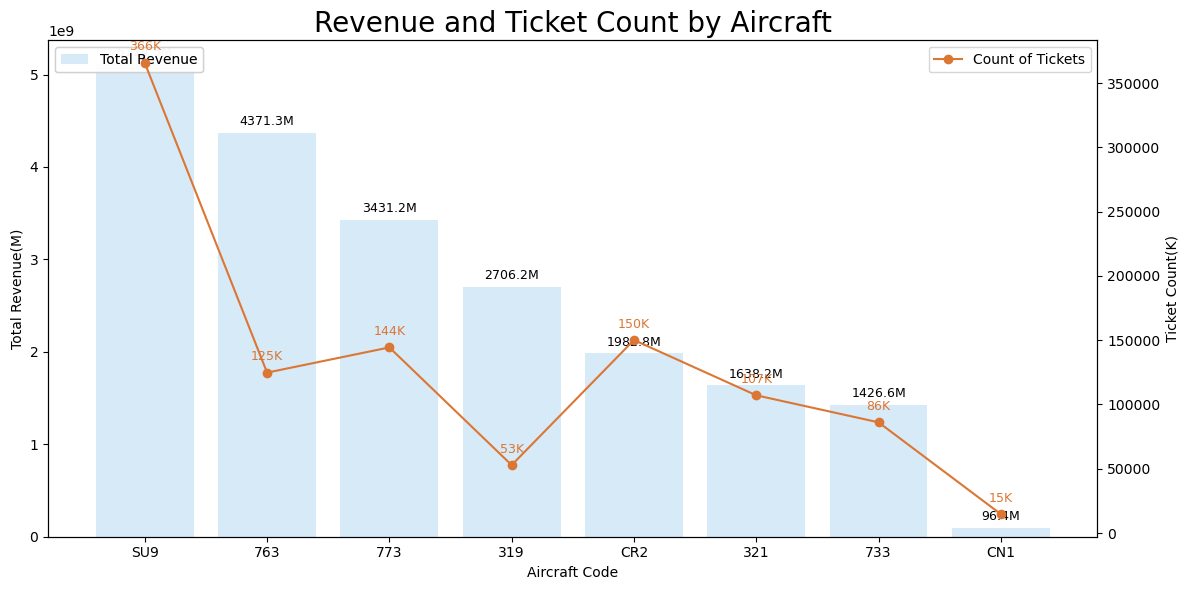

In [109]:
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot
bars= ax.bar(df2['aircraft_code'], df2['Total_Revenue'], color='#d6eaf8', label='Total Revenue')

# Bar labels in "M" (millions)
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(df2['Total_Revenue']) * 0.01,  # Small offset
        f'{height / 1_000_000:.1f}M',
        ha='center', va='bottom',
        fontsize=9, rotation=0, color='black'
    )

# Line plot on the same axis
ax2=ax.twinx()
line= ax2.plot(df2['aircraft_code'], df2['ticket_count'], color='#dc7633', marker='o', label='Count of Tickets')

# Add data labels for the line plot
for x, y in zip(df2['aircraft_code'], df2['ticket_count']):
    ax2.text(x, y + max(df2['ticket_count']) * 0.02, f'{y/1000:.0f}K', ha='center', va='bottom', fontsize=9, color='#dc7633')

# Labels and layout
ax.set_xlabel('Aircraft Code')
ax.set_ylabel('Total Revenue(M)')
ax2.set_ylabel('Ticket Count(K)')
ax.set_title('Revenue and Ticket Count by Aircraft',fontsize=20)

# Add both legends (bar and line)
bar_legend = ax.legend(loc='upper left')
line_legend = ax2.legend(loc='upper right')
ax.add_artist(bar_legend)  # Ensure both show up

plt.tight_layout()
plt.show()

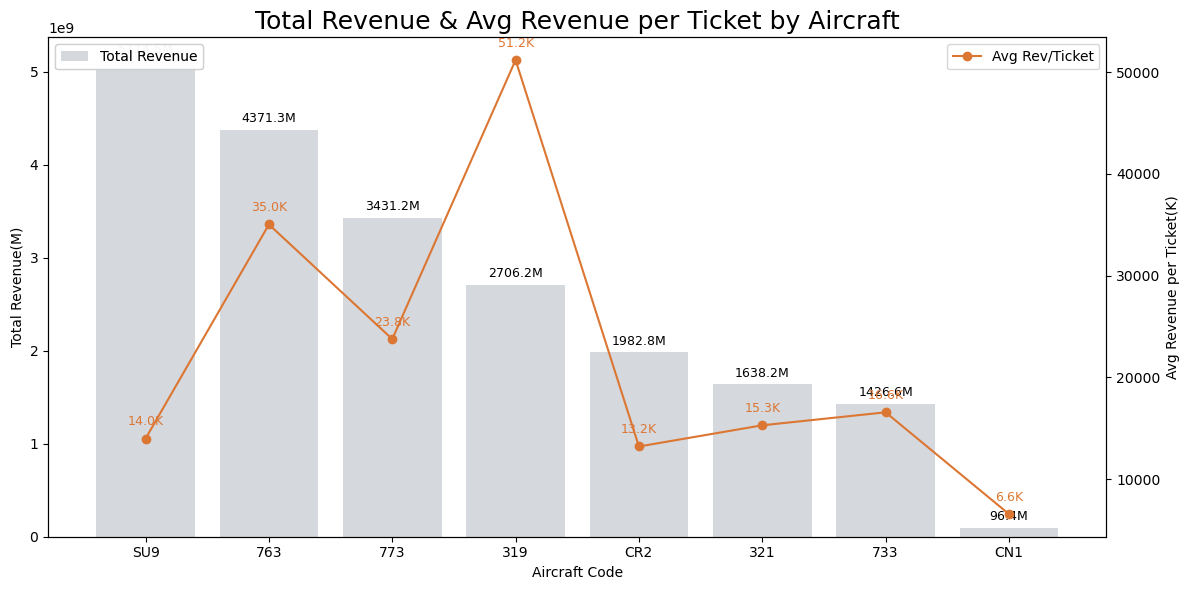

In [111]:
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for Total Revenue
bars = ax.bar(df2['aircraft_code'], df2['Total_Revenue'], color='#d5d8dc', label='Total Revenue')

# Bar labels in "M" format
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(df2['Total_Revenue']) * 0.01,
        f'{height / 1_000_000:.1f}M',
        ha='center', va='bottom',
        fontsize=9, rotation=0, color='black'
    )

# Line plot for Average Revenue per Ticket
ax2 = ax.twinx()
ax2.plot(df2['aircraft_code'], df2['Avg_Rev_Per_Ticket'], color='#dc7633', marker='o', label='Avg Rev/Ticket')

# Add line labels in 'K' format (or ₹ if needed)
for x, y in zip(df2['aircraft_code'], df2['Avg_Rev_Per_Ticket']):
    ax2.text(
        x,
        y + max(df2['Avg_Rev_Per_Ticket']) * 0.02,  # More spacing to avoid bar labels
        f'{y/1000:.1f}K',  # or ₹{y/1000:.1f}K
        ha='center', va='bottom',
        fontsize=9, color='#dc7633'
    )

# Labels and layout
ax.set_xlabel('Aircraft Code')
ax.set_ylabel('Total Revenue(M)')
ax2.set_ylabel('Avg Revenue per Ticket(K)')
ax.set_title('Total Revenue & Avg Revenue per Ticket by Aircraft', fontsize=18)

# Add both legends (bar and line)
bar_legend = ax.legend(loc='upper left')
line_legend = ax2.legend(loc='upper right')
ax.add_artist(bar_legend)  # Ensure both show up

# Tidy layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
**Calculate the average occupancy per aircraft**

In [78]:
occupancy_Rate=pd.read_sql_query("""SELECT 
    a.aircraft_code, 
    AVG(a.seats_count) AS booked_seats, 
    b.num_seats, 
    AVG(a.seats_count) * 1.0 / b.num_seats AS occupancy_rate
FROM (
    SELECT 
        f.aircraft_code, 
        f.flight_id, 
        COUNT(*) AS seats_count
    FROM boarding_passes bp
    INNER JOIN flights f ON bp.flight_id = f.flight_id
    GROUP BY f.aircraft_code, f.flight_id
) AS a
INNER JOIN (
    SELECT 
        aircraft_code, 
        COUNT(*) AS num_seats
    FROM seats
    GROUP BY aircraft_code
) AS b ON a.aircraft_code = b.aircraft_code
GROUP BY a.aircraft_code;""",conn)
occupancy_Rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


In [79]:
occupancy_Rate['Inc occupancy rate'] = occupancy_Rate['occupancy_rate'] * 1.10
occupancy_Rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [ ]:
**Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate**

In [80]:
total_revenue = pd.read_sql_query(""" select aircraft_code, sum(amount) as total_revenue
from ticket_flights 
join flights 
on ticket_flights.flight_id = flights.flight_id 
group by aircraft_code""", conn)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [81]:
pd.set_option("display.float_format", str)

In [82]:
occupancy_Rate['Inc Annual Turnover'] = (total_revenue['total_revenue']/occupancy_Rate['occupancy_rate'])*occupancy_Rate['Inc occupancy rate']
occupancy_Rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372493,3774326050.0000005
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484383,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.6442610715841441,5625933170.000001
